In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import string
import nltk

# Algorithm
import string
import nltk
from sklearn import svm, datasets
from nltk.corpus import stopwords
from sklearn.svm import SVC   #Support Vector Classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline

In [ ]:
#Load the data
from google.colab import files
uploaded = files.upload()

Saving spam_ham_dataset.csv to spam_ham_dataset.csv


In [ ]:
#Read the CSV file
df = pd.read_csv('spam_ham_dataset.csv')

#Print the first 10 rows of data
df.head(10)

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
5,2949,ham,Subject: ehronline web address change\r\nthis ...,0
6,2793,ham,Subject: spring savings certificate - take 30 ...,0
7,4185,spam,Subject: looking for medication ? we ` re the ...,1
8,2641,ham,Subject: noms / actual flow for 2 / 26\r\nwe a...,0
9,1870,ham,"Subject: nominations for oct . 21 - 23 , 2000\...",0


In [ ]:
# Drop unnecesery and empty colums
cols = [0,3]
df.drop(df.columns[cols],axis=1,inplace=True)
df.head(10)

,label,text
0,ham,Subject: enron methanol ; meter # : 988291\r\n...
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,spam,"Subject: photoshop , windows , office . cheap ..."
4,ham,Subject: re : indian springs\r\nthis deal is t...
5,ham,Subject: ehronline web address change\r\nthis ...
6,ham,Subject: spring savings certificate - take 30 ...
7,spam,Subject: looking for medication ? we ` re the ...
8,ham,Subject: noms / actual flow for 2 / 26\r\nwe a...
9,ham,"Subject: nominations for oct . 21 - 23 , 2000\..."


In [ ]:
#Rename columns as category and message
df.rename(columns = {'label':'Category', 'text':'Message'}, inplace = True)
df.head(10)

,Category,Message
0,ham,Subject: enron methanol ; meter # : 988291\r\n...
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,spam,"Subject: photoshop , windows , office . cheap ..."
4,ham,Subject: re : indian springs\r\nthis deal is t...
5,ham,Subject: ehronline web address change\r\nthis ...
6,ham,Subject: spring savings certificate - take 30 ...
7,spam,Subject: looking for medication ? we ` re the ...
8,ham,Subject: noms / actual flow for 2 / 26\r\nwe a...
9,ham,"Subject: nominations for oct . 21 - 23 , 2000\..."


In [ ]:
#Get the number of rows and columns as a tuple
print(f'Dataset consist of {df.shape[0]} E-Mails.')

Dataset consist of 5171 E-Mails.


In [ ]:
#Get the total number of ham and spam dataset
df['Category'].value_counts()

ham     3672
spam    1499
Name: Category, dtype: int64

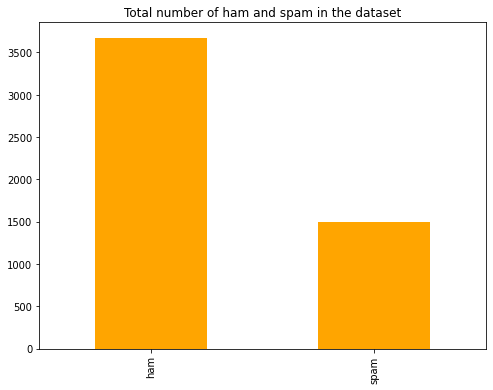

In [ ]:
plt.figure(figsize=(8,6))

df['Category'].value_counts().plot.bar(color = ["orange","orange"])
plt.title('Total number of ham and spam in the dataset')
plt.show()

Text(0.5, 1.0, 'Ham Word Cloud')

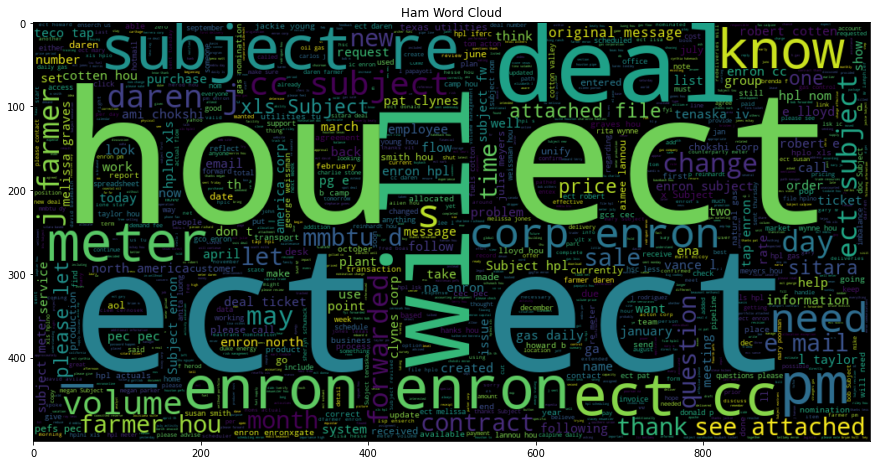

In [ ]:
from wordcloud import WordCloud

plt.figure(figsize = (15,15)) 
wc = WordCloud(max_words = 2000 , width = 1000 , height = 500).generate(" ".join(df[df.Category =="ham" ].Message))
plt.imshow(wc , interpolation = 'bilinear')
plt.title("Ham Word Cloud")

Text(0.5, 1.0, 'Spam Word Cloud')

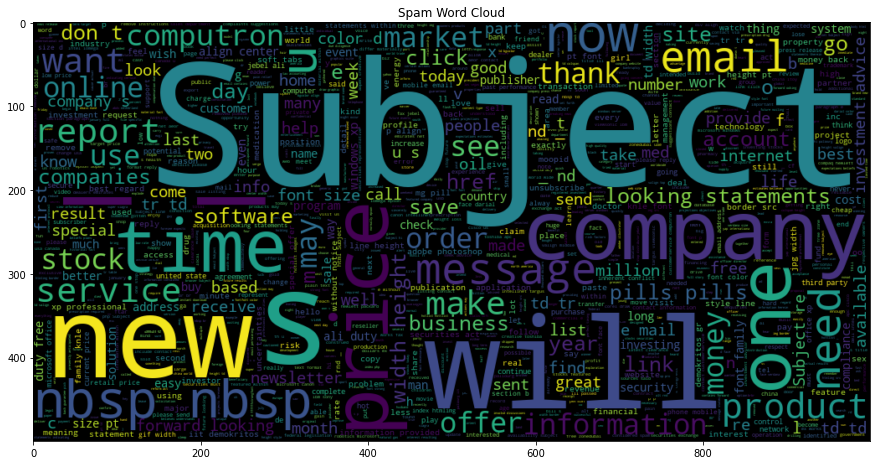

In [ ]:
plt.figure(figsize = (15,15)) 
wc = WordCloud(max_words = 2000 , width = 1000 , height = 500).generate(" ".join(df[df.Category =="spam" ].Message))
plt.imshow(wc , interpolation = 'bilinear')
plt.title("Spam Word Cloud")

In [ ]:
#0: Ham, 1: Spam
df['Category']=df['Category'].apply(lambda x: 1 if x=='spam' else 0)
df.head()

,Category,Message
0,0,Subject: enron methanol ; meter # : 988291\r\n...
1,0,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,0,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,1,"Subject: photoshop , windows , office . cheap ..."
4,0,Subject: re : indian springs\r\nthis deal is t...


In [ ]:
X=df['Message']
Y=df['Category']

In [ ]:
#Download the stopwords package
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
def process_text(text):
  #1 Remove the punctuation
  #2 Remove stopwords
  #3 return a list of a clean text words

  #1
  nopunc = [char for char in text if char not in string.punctuation]
  nopunc = ''.join(nopunc)

  #2
  clean_words = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
  
  #3
  return clean_words
     

In [ ]:
# Show the tokenization (a list of tokens also called lemmas)
df['Message'].head().apply(process_text)

0    [Subject, enron, methanol, meter, 988291, foll...
1    [Subject, hpl, nom, january, 9, 2001, see, att...
2    [Subject, neon, retreat, ho, ho, ho, around, w...
3    [Subject, photoshop, windows, office, cheap, m...
4    [Subject, indian, springs, deal, book, teco, p...
Name: Message, dtype: object

In [ ]:
#Convert a collection of text to a matrix of tokens
from sklearn.feature_extraction.text import CountVectorizer
messages_bow = CountVectorizer(analyzer=process_text).fit_transform(df['Message'])

In [ ]:
#Split the data into %80 training and %20 testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(messages_bow, df['Category'], test_size = 0.3, random_state= 109)

In [ ]:
#Get the shape of messages_bow (5171 row of data and 50381 colums in our data set)
messages_bow.shape

(5171, 50381)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,Y)

In [ ]:

clf_svm= Pipeline([
    ('vectorizer', CountVectorizer()),
    ('svc', SVC(kernel="rbf",C=1000,gamma=0.001))
])
     

In [ ]:
clf_svm.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('svc', SVC(C=1000, gamma=0.001))])

In [ ]:

y_pred_SVM=clf_svm.predict(X_test)

In [ ]:
svm_acc=accuracy_score(y_test,y_pred_SVM)
svm_acc
     

0.9574632637277649

In [ ]:
def spam_dect(clf,txt):
    a=clf.predict([txt])
    if a==1:
        print(f"{clf[1]} This is a Spam email \n")
    else:
        print(f"{clf[1]} This is a Real email \n")
     

In [ ]:

message= input()

hello


In [ ]:
clf_2 = clf_svm
i = [clf_2]
for x in i:
    spam_dect(x,message)

SVC(C=1000, gamma=0.001) This is a Spam email 



DENEME

In [ ]:
 # import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2] # we only take the first two features. We could
 # avoid this ugly slicing by using a two-dim dataset
y = iris.target

In [ ]:
# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0 # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=1,gamma=0.001).fit(X, y)

In [ ]:
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
 np.arange(y_min, y_max, h))

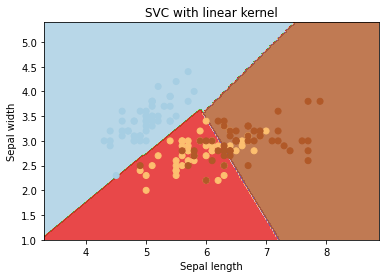

In [ ]:
plt.subplot(1, 1, 1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear kernel')
plt.show()

DENEME2